In [19]:
#loading the modules
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import os
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import datetime
import requests

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [20]:
#fetching the data from the website
url = 'https://opendata.ecdc.europa.eu/covid19/casedistribution/csv'
req = requests.get(url)
csv_file = open('covid_2019.csv', 'wb')
url_content = req.content
csv_file.write(url_content)
csv_file.close()


In [21]:
#If i only want to read the data instead of download everytime.
covid = pd.read_csv('covid_2019.csv')

In [22]:
#Let's do what I call the '3s' .head(), info(), and describe(). This gives us a high overview of the data that we're looking at.
covid.head()

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0  26/09/2020   26      9  2020      6       2             Afghanistan    AF   
1  25/09/2020   25      9  2020     16       0             Afghanistan    AF   
2  24/09/2020   24      9  2020     25       5             Afghanistan    AF   
3  23/09/2020   23      9  2020     71       2             Afghanistan    AF   
4  22/09/2020   22      9  2020     30       3             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           1.540413           
1                                           1.614016           
2                                           1.645560           
3                                           1.642931           
4                                           1.524640

In [23]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45181 entries, 0 to 45180
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dateRep                                                     45181 non-null  object 
 1   day                                                         45181 non-null  int64  
 2   month                                                       45181 non-null  int64  
 3   year                                                        45181 non-null  int64  
 4   cases                                                       45181 non-null  int64  
 5   deaths                                                      45181 non-null  int64  
 6   countriesAndTerritories                                     45181 non-null  object 
 7   geoId                                                       44985 non-null  object 
 

In [24]:
#Lets drop the null values
covid = covid.dropna()

In [25]:
#Assign category type for year/mo/day
covid['year'] = covid['year'].astype('category')
covid['month'] = covid['month'].astype('category')
covid['day'] = covid['day'].astype('category')

In [26]:
covid.describe()

cases        deaths   popData2019  \
count  42217.000000  42217.000000  4.221700e+04   
mean     771.997181     23.435914  4.322901e+07   
std     4619.860642    130.361755  1.586474e+08   
min    -8261.000000  -1918.000000  8.150000e+02   
25%        0.000000      0.000000  1.355982e+06   
50%       14.000000      0.000000  8.519373e+06   
75%      186.000000      3.000000  2.916192e+07   
max    97894.000000   4928.000000  1.433784e+09   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
count                                       42217.000000           
mean                                           34.243909           
std                                            78.447313           
min                                          -147.419587           
25%                                             0.404341           
50%                                             4.730044           
75%                                            27.985186           
max                                          1058.225943

In [27]:
#Transform popData and deaths into deaths per population (per 1,000,000)
covid['deathPpop'] = covid['popData2019'] / covid['deaths'] / 1000000

In [28]:
covid['deathRate'] = covid['deaths']/ covid['cases']

In [29]:
covid['deathRate'].values

array([0.33333333, 0.        , 0.2       , ...,        nan, 0.        ,
              nan])

In [33]:
covid.loc[ 
    (covid['deathRate'] == np.inf) | 
    (covid['deathRate'] == pd.isnull), 'deathRate' 
    ] = 0

In [34]:
#Check that we have the correct values 0..1
covid['deathRate'].unique()

array([0.33333333, 0.        , 0.2       , ..., 0.23636364, 0.08730159,
       0.03396226])

In [39]:
covid

dateRep day month  year  cases  deaths countriesAndTerritories  \
0      26/09/2020  26     9  2020      6       2             Afghanistan   
1      25/09/2020  25     9  2020     16       0             Afghanistan   
2      24/09/2020  24     9  2020     25       5             Afghanistan   
3      23/09/2020  23     9  2020     71       2             Afghanistan   
4      22/09/2020  22     9  2020     30       3             Afghanistan   
...           ...  ..   ...   ...    ...     ...                     ...   
45163  07/04/2020   7     4  2020      0       0                Zimbabwe   
45164  06/04/2020   6     4  2020      0       0                Zimbabwe   
45165  05/04/2020   5     4  2020      0       0                Zimbabwe   
45166  04/04/2020   4     4  2020      1       0                Zimbabwe   
45167  03/04/2020   3     4  2020      0       0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  \
0        AF                  AFG   38041757.0         Asia   
1        AF                  AFG   38041757.0         Asia   
2        AF                  AFG   38041757.0         Asia   
3        AF                  AFG   38041757.0         Asia   
4        AF                  AFG   38041757.0         Asia   
...     ...                  ...          ...          ...   
45163    ZW                  ZWE   14645473.0       Africa   
45164    ZW                  ZWE   14645473.0       Africa   
45165    ZW                  ZWE   14645473.0       Africa   
45166    ZW                  ZWE   14645473.0       Africa   
45167    ZW                  ZWE   14645473.0       Africa   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  deathPpop  \
0                                               1.540413           19.020878   
1                                               1.614016                 inf   
2                                               1.645560            7.608351   
3                                               1.642931           19.020878   
4                                               1.524640           12.680586   
...                                                  ...                 ...   
45163                                           0.047796                 inf   
45164                                           0.047796                 inf   
45165                                           0.047796                 inf   
45166                                           0.054624                 inf   
45167                                           0.054624                 inf   

       deathRate  
0       0.333333  
1       0.000000  
2       0.200000  
3       0.028169  
4       0.100000  
...          ...  
45163   0.000000  
45164        NaN  
45165   0.000000  
45166   0.000000  
45167   0.000000  

[42217 rows x 14 columns]

In [40]:
covid = covid.reset_index()

In [41]:
#Scale deaths 0..1
scaler = MinMaxScaler()

In [100]:
rescaled_covid = scaler.fit_transform(covid[['deaths']])

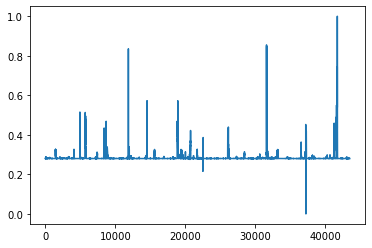

In [101]:
plt.plot(rescaled_covid)

In [102]:
#Add scaled_deaths to the dataframe
covid['scaled_deaths'] = rescaled_covid

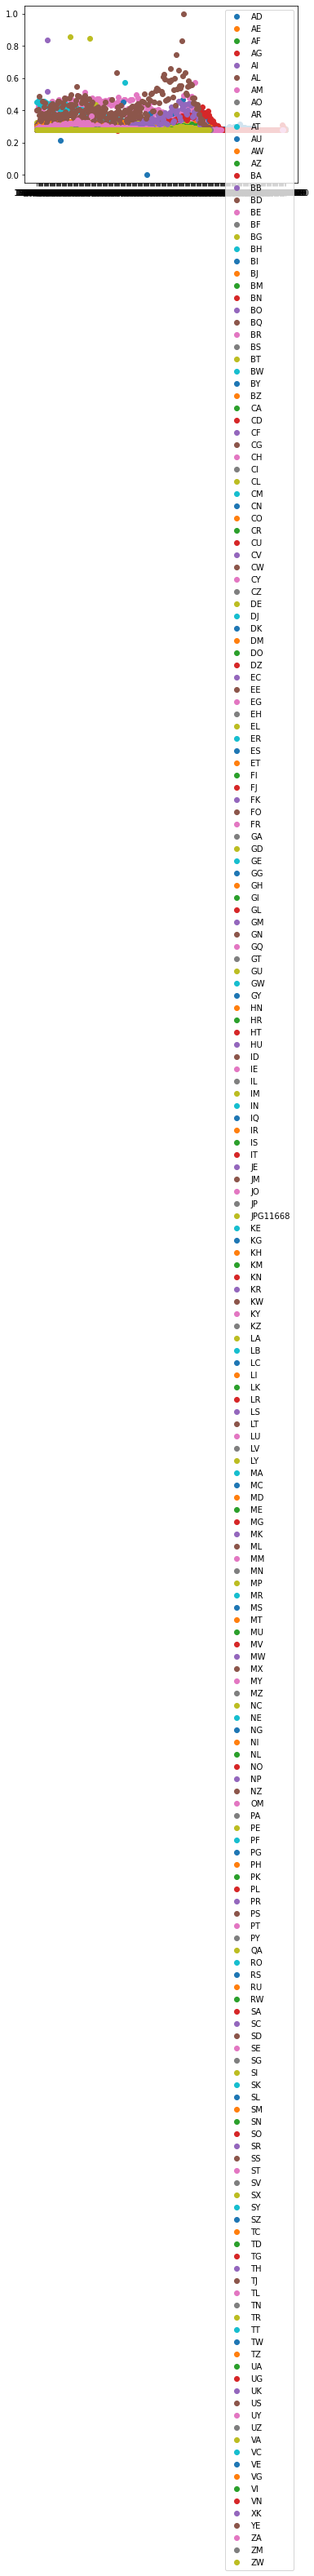

In [103]:
#I know this is going to be convaluted due to the number of countries, but color will really help us understand the scatter plot better.
groups = covid.groupby('geoId')
for name, group in groups:
    plt.plot(group['dateRep'], group['scaled_deaths'], marker='o', linestyle='', label=name)
plt.legend()

In [104]:
#It looks like we had a couple of really bad days around the globe. Specfically in Albania, with the highest death in a single day reported.

In [105]:
covid['deathPpop'] = covid['deaths']/covid['popData2019'] / 1000000

In [106]:
#Looks like we have some issues with our  deaths. Lets get rid of deaths < 0. We're also reporting negative cases.
covid = covid[covid['deaths'] >=0]
covid = covid[covid['cases'] >=0]

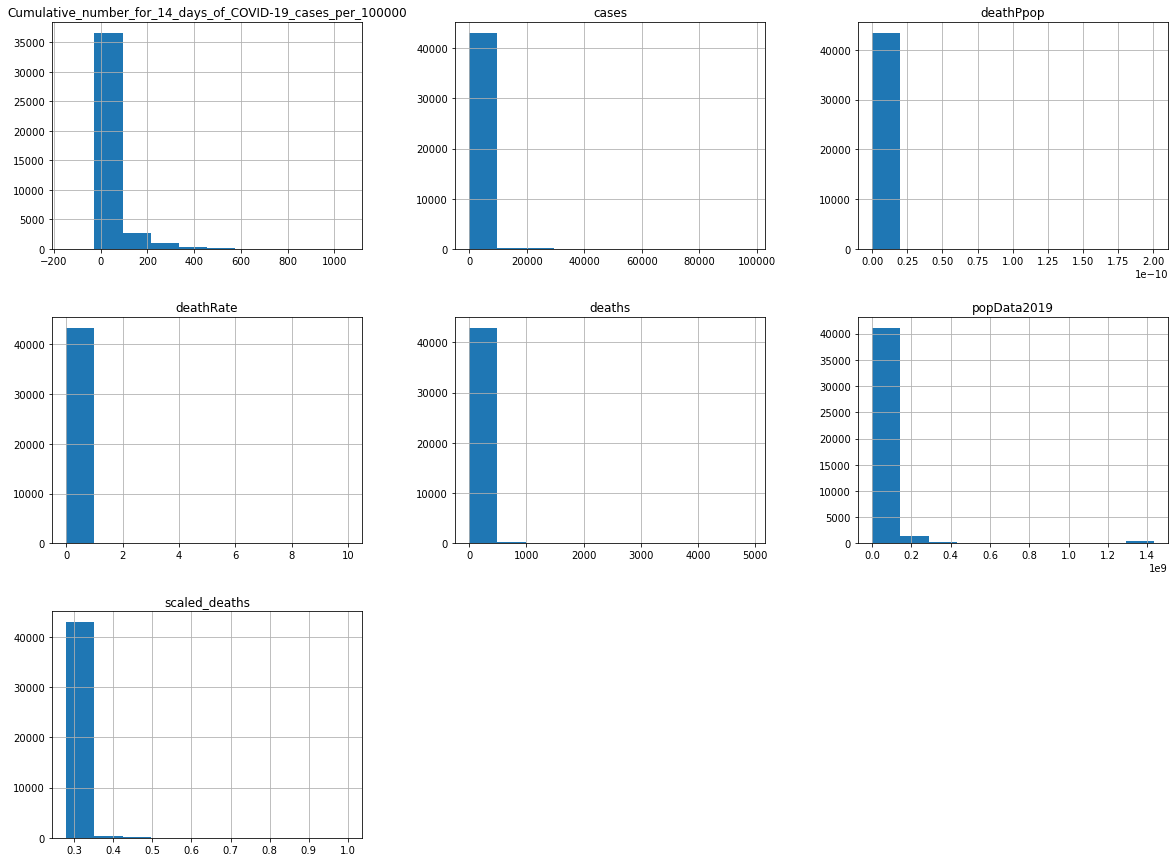

In [107]:
#Lets plot the data just to see what we've got
covid.hist(figsize=(20,15))
plt.show()

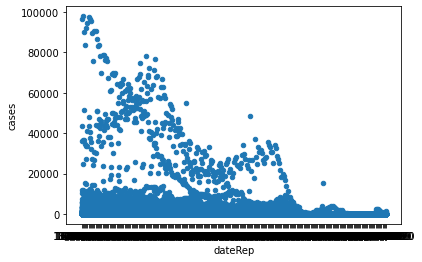

In [108]:
#It seems we have 10 Variables. day, month, and year can be considered a single variable for our purposes. Next do a few scatter plots.
#covid.plot(kind='scatter', x='cases',y='deaths')
covid.plot(kind='scatter', x='dateRep',y ='cases')
plt.show()

In [109]:
#Let's verify that the US is 'US' and not 'USA'
covid['geoId'].unique()

array(['AF', 'AL', 'DZ', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW', 'AU',
       'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ', 'BM',
       'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF', 'BI',
       'KH', 'CM', 'CA', 'CV', 'JPG11668', 'KY', 'CF', 'TD', 'CL', 'CN',
       'CO', 'KM', 'CG', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'CD',
       'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE', 'SZ',
       'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'PF', 'GA', 'GM', 'GE', 'DE',
       'GH', 'GI', 'EL', 'GL', 'GD', 'GU', 'GT', 'GG', 'GN', 'GW', 'GY',
       'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'IR', 'IQ', 'IE', 'IM',
       'IL', 'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'XK', 'KW', 'KG',
       'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MG', 'MW',
       'MY', 'MV', 'ML', 'MT', 'MR', 'MU', 'MX', 'MD', 'MC', 'MN', 'ME',
       'MS', 'MA', 'MZ', 'MM', nan, 'NP', 'NL', 'NC', 'NZ', 'NI', 'NE',
       'NG', 'MK', 'MP', 'NO', 'OM', 'PK', 'PS', 'PA

In [127]:
#It's confirmed, 'US' is the right geoId. Lets zoom in on the US data by creating a dataframe.
us_covid = covid[covid['geoId'] == 'US']

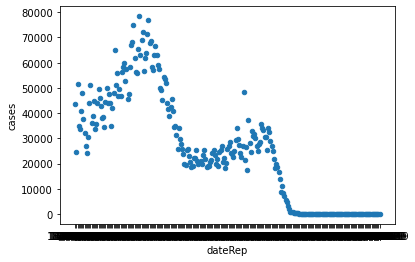

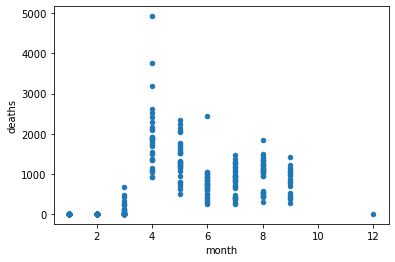

In [128]:
us_covid.plot(kind='scatter', x='dateRep',y ='cases')
us_covid.plot(kind='scatter',x='month',y='deaths')
plt.show()

In [129]:
grouped_us_covid = us_covid.groupby('month')

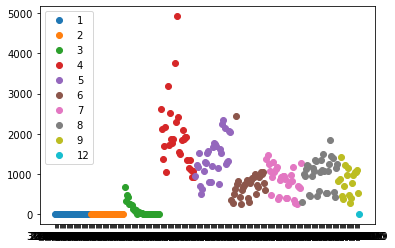

In [131]:
for name, group in grouped_us_covid:
    plt.plot(group['dateRep'], group['deaths'], marker='o', linestyle='', label=name)
plt.legend()

In [133]:
#It looks like April was by far our worse month for deaths
grouped_us_covid.agg('mean')

cases       deaths  popData2019  \
month                                           
1          0.193548     0.000000  329064917.0   
2          2.068966     0.000000  329064917.0   
3       5308.193548   102.258065  329064917.0   
4      29176.300000  1926.533333  329064917.0   
5      23563.709677  1381.129032  329064917.0   
6      27338.933333   745.300000  329064917.0   
7      61434.258065   836.451613  329064917.0   
8      48456.419355   999.967742  329064917.0   
9      37627.500000   809.111111  329064917.0   
12         0.000000     0.000000  329064917.0   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  \
month                                                               
1                                               0.000544            
2                                               0.004747            
3                                               8.872021            
4                                             112.680593            
5                                             105.614821            
6                                             101.567548            
7                                             236.531219            
8                                             226.902066            
9                                             167.521927            
12                                                   NaN            

          deathPpop  deathRate  scaled_deaths  
month                                          
1      0.000000e+00   0.000000       0.280164  
2      0.000000e+00   0.000000       0.280164  
3      3.107535e-13   0.042708       0.295101  
4      5.854569e-12   0.067070       0.561574  
5      4.197132e-12   0.058129       0.481906  
6      2.264903e-12   0.029221       0.389030  
7      2.541905e-12   0.013460       0.402345  
8      3.038816e-12   0.020326       0.426230  
9      2.458819e-12   0.021328       0.398351  
12     0.000000e+00   0.000000       0.280164

C:\Users\joshu\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:80: UserWarning: Attempting to set identical left == right == 329064917.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\joshu\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:81: UserWarning: Attempting to set identical bottom == top == 329064917.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\joshu\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:71: UserWarning: Attempting to set identical left == right == 329064917.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


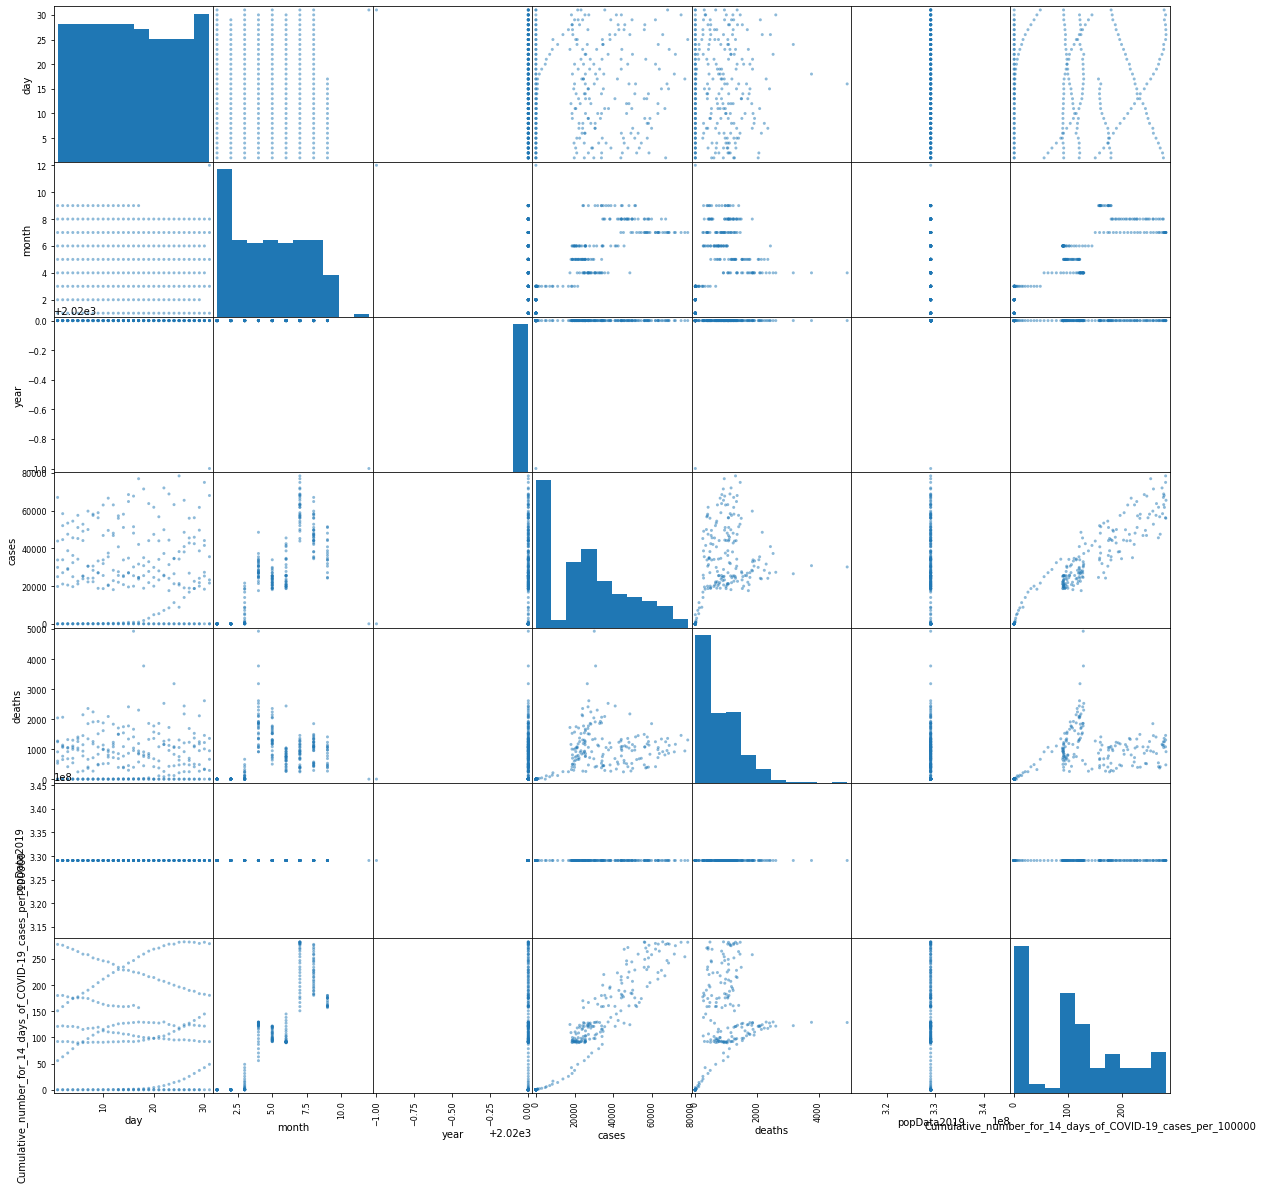

In [62]:
scatter_matrix(us_covid, figsize=(20,20))
plt.show()

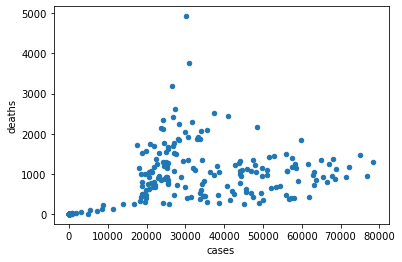

In [63]:
us_covid.plot(kind='scatter',x='cases',y='deaths')

In [53]:
covid['datetime'] = pd.to_datetime(covid['year'].astype(str) + covid['month'].astype(str) + covid['day'].astype(str), format='%Y%m%d')

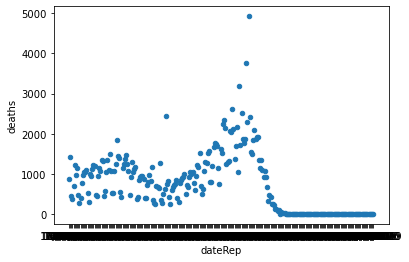

In [127]:
us_covid.plot(kind='scatter', x='dateRep',y='deaths')

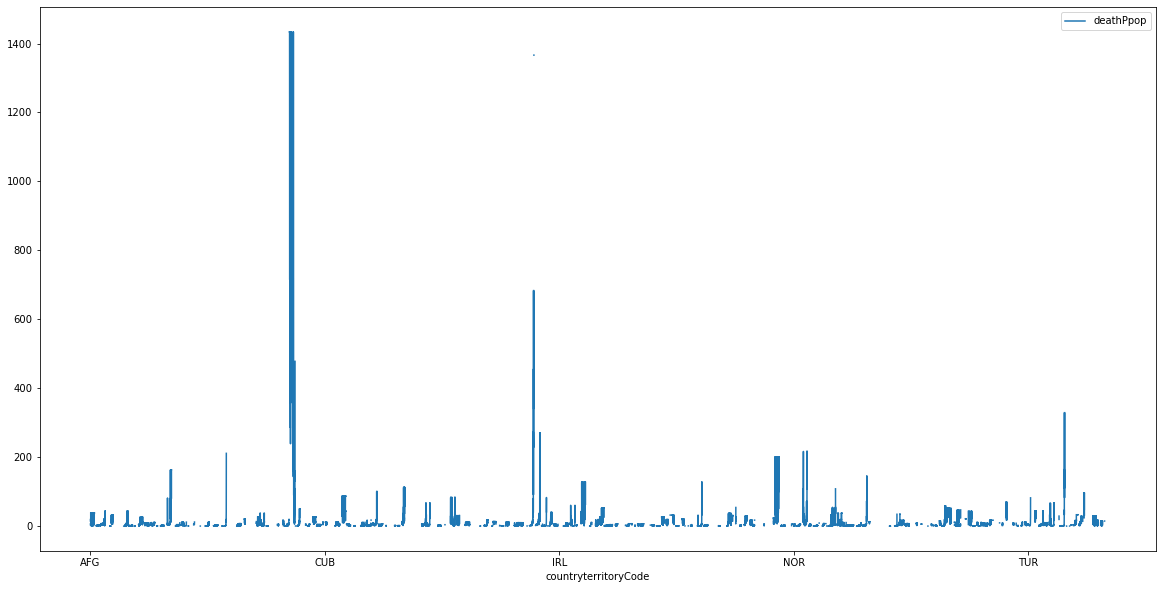

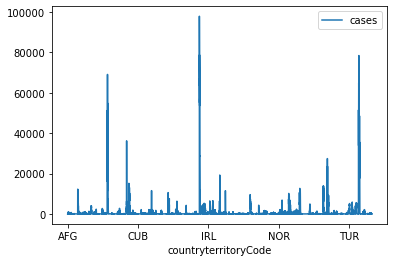

In [125]:
covid.plot(x='countryterritoryCode', y='deathPpop', figsize=(20,10))
covid.plot(x='countryterritoryCode', y='cases')

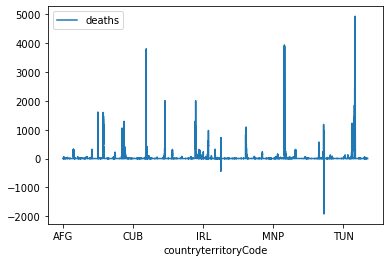

In [18]:
covid.plot(x='countryterritoryCode', y='deaths')

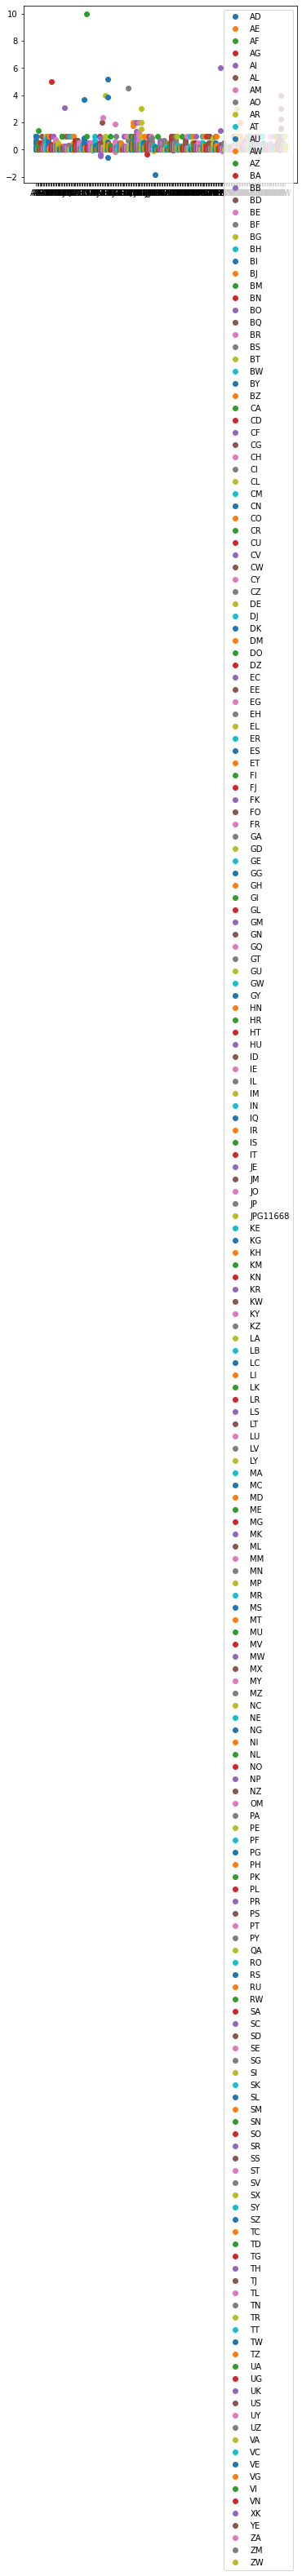

In [111]:
#Plot deathRate
for name, group in groups:
    plt.plot(group['geoId'], group['deathRate'], marker='o', linestyle='', label=name)
plt.legend()

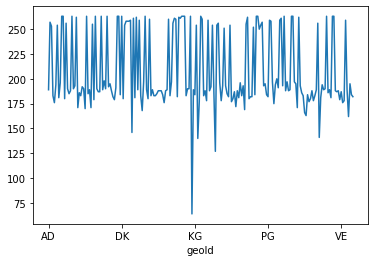

In [125]:
groups.count()['deathRate'].plot()

In [ ]:
#This is the percent of persons within a country that died that have gotten covid (deaths / cases)

# Insights
In most countries, there are between 0-2% of cases results in deaths and a handful of countries in the 6% - 2% with one extreme outlier in the 10% (AF).

In the U.S., we had a big spike of cases(80,000 in march, and we are now averaging 20,000-40,000. It's not great, but it is improvement). We're averaging 800-1000 deaths a day from covid in Q3.